## Wine  Quality Analysis 

In [1]:
# importing libraries 

In [2]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

In [4]:
data = pd.read_csv("WineQT.csv")

In [5]:
# Checking the head of the dataset 

In [6]:
data.head()

,fixed acidity,volatile acidity,citric acid,residual sugar,chlorides,free sulfur dioxide,total sulfur dioxide,density,pH,sulphates,alcohol,quality,Id
0,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,0
1,7.8,0.88,0.00,2.6,0.098,25.0,67.0,0.9968,3.20,0.68,9.8,5,1
2,7.8,0.76,0.04,2.3,0.092,15.0,54.0,0.9970,3.26,0.65,9.8,5,2
3,11.2,0.28,0.56,1.9,0.075,17.0,60.0,0.9980,3.16,0.58,9.8,6,3
4,7.4,0.70,0.00,1.9,0.076,11.0,34.0,0.9978,3.51,0.56,9.4,5,4


In [7]:
# setting the grid style 

In [8]:
sns.set(style = "whitegrid")

In [9]:
# Data Shape

In [10]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1143 entries, 0 to 1142
Data columns (total 13 columns):
 #   Column                Non-Null Count  Dtype  
---  ------                --------------  -----  
 0   fixed acidity         1143 non-null   float64
 1   volatile acidity      1143 non-null   float64
 2   citric acid           1143 non-null   float64
 3   residual sugar        1143 non-null   float64
 4   chlorides             1143 non-null   float64
 5   free sulfur dioxide   1143 non-null   float64
 6   total sulfur dioxide  1143 non-null   float64
 7   density               1143 non-null   float64
 8   pH                    1143 non-null   float64
 9   sulphates             1143 non-null   float64
 10  alcohol               1143 non-null   float64
 11  quality               1143 non-null   int64  
 12  Id                    1143 non-null   int64  
dtypes: float64(11), int64(2)
memory usage: 116.2 KB


In [11]:
# We have a total of 13  columns in the data set 

In [12]:
# We get a summary statistics of the data to find the mean , medium of  numeric columns

In [16]:
data.describe().T
# we transporse the data to have columns as raws

,count,mean,std,min,25%,50%,75%,max
fixed acidity,1143.0,8.311111,1.747595,4.60000,7.10000,7.90000,9.100000,15.90000
volatile acidity,1143.0,0.531339,0.179633,0.12000,0.39250,0.52000,0.640000,1.58000
citric acid,1143.0,0.268364,0.196686,0.00000,0.09000,0.25000,0.420000,1.00000
residual sugar,1143.0,2.532152,1.355917,0.90000,1.90000,2.20000,2.600000,15.50000
chlorides,1143.0,0.086933,0.047267,0.01200,0.07000,0.07900,0.090000,0.61100
free sulfur dioxide,1143.0,15.615486,10.250486,1.00000,7.00000,13.00000,21.000000,68.00000
total sulfur dioxide,1143.0,45.914698,32.782130,6.00000,21.00000,37.00000,61.000000,289.00000
density,1143.0,0.996730,0.001925,0.99007,0.99557,0.99668,0.997845,1.00369
pH,1143.0,3.311015,0.156664,2.74000,3.20500,3.31000,3.400000,4.01000
sulphates,1143.0,0.657708,0.170399,0.33000,0.55000,0.62000,0.730000,2.00000


In [17]:
# Data Quality Checks : Checking for missing values 

In [18]:
data.isnull().sum()

fixed acidity           0
volatile acidity        0
citric acid             0
residual sugar          0
chlorides               0
free sulfur dioxide     0
total sulfur dioxide    0
density                 0
pH                      0
sulphates               0
alcohol                 0
quality                 0
Id                      0
dtype: int64

In [19]:
# Checking for Duplicated Values

In [21]:
data.duplicated().sum()

np.int64(0)

In [22]:
# There are no duplications in the data set 

In [23]:
# Cheking The ID column 

In [24]:
data['Id'].nunique(), data.shape[0]

(1143, 1143)

In [25]:
# The Id column is only a unique identifies and will be excluded from analysis

In [26]:
# Target varible analysis - Wine Quality 

In [27]:
data['quality'].value_counts().sort_index()

quality
3      6
4     33
5    483
6    462
7    143
8     16
Name: count, dtype: int64

In [28]:
# Visualizing the wine quality distribution 

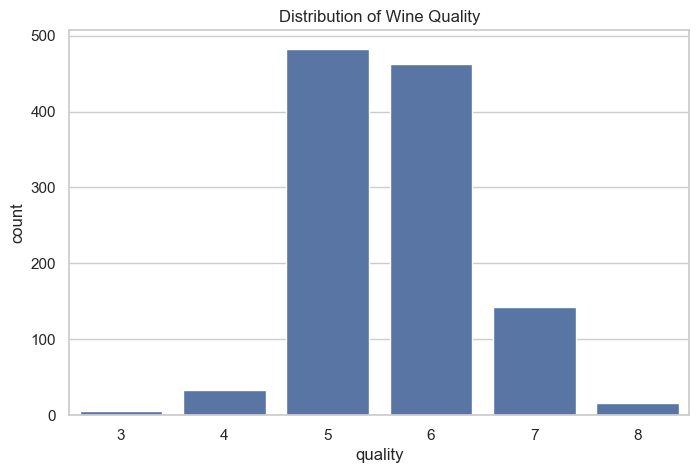

In [30]:
plt.figure(figsize=(8,5))
sns.countplot(x='quality', data=data)
plt.title("Distribution of Wine Quality")
plt.show();

In [31]:
# Observations :
    # Wine Quality is imbalanced 
    # Most wines falls between quality 5 and 6 
    # Very few wines have extremely low of high quality 

In [32]:
# Univariant Analysis 

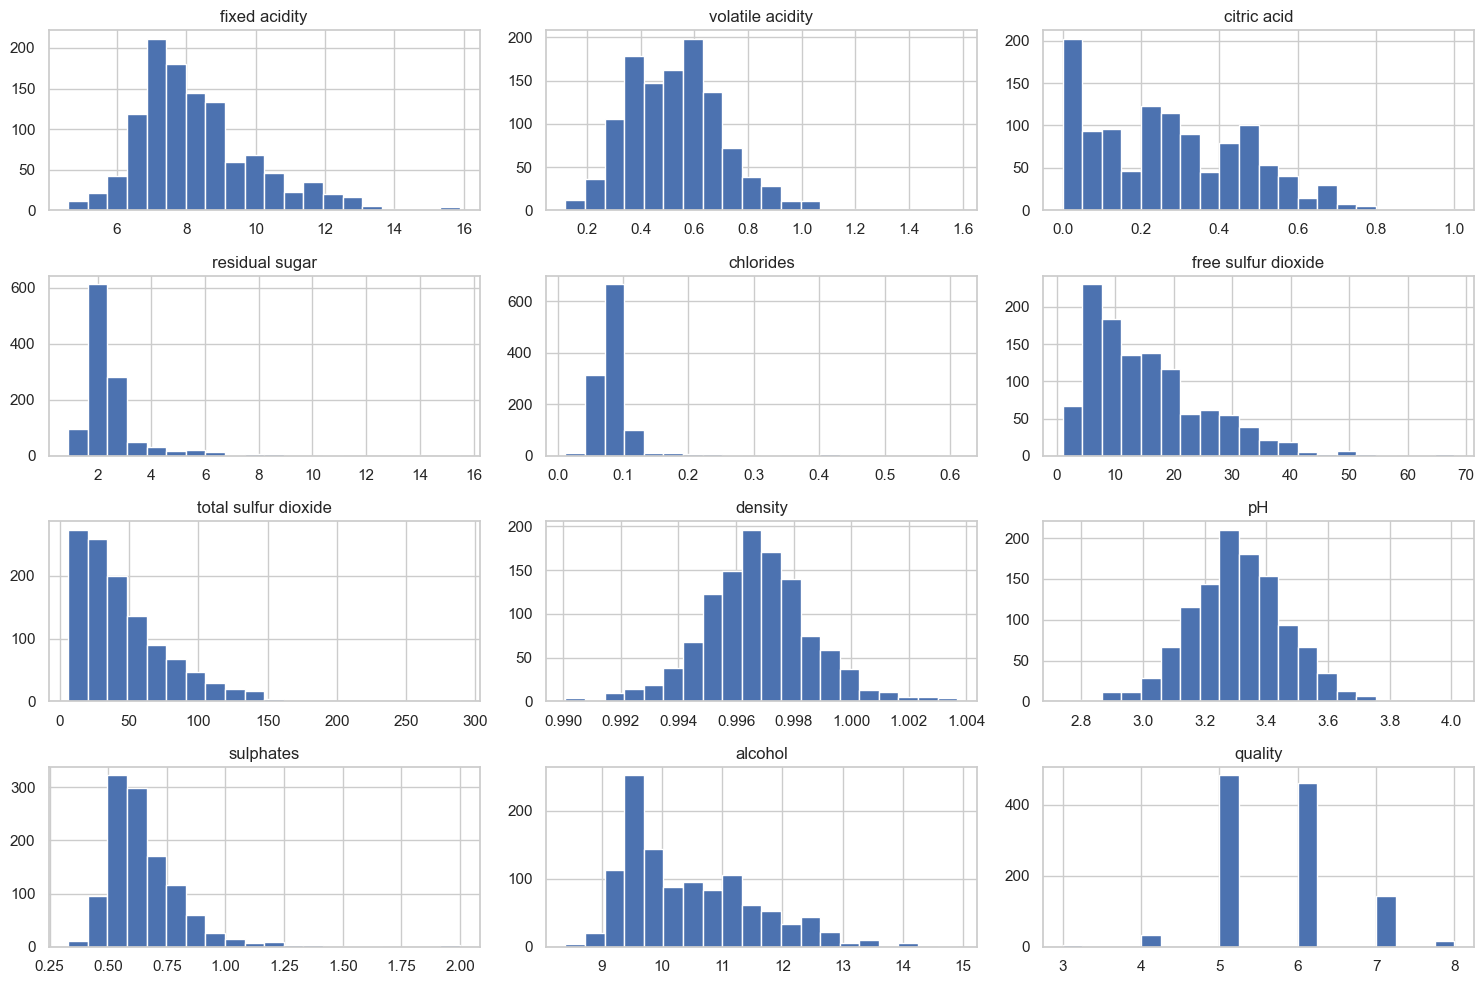

In [33]:
data.drop(columns =['Id']).hist(figsize=(15,10), bins =20)
plt.tight_layout()
plt.show();

In [34]:
# Observations 
    #1. Alcohol and sulphates show right skewness
    #2.Residual sugar and sulfur dioxide contain extreme values
    #3.pH has a narrow distribution.

In [35]:
# Detecting Outliers in the dataset 

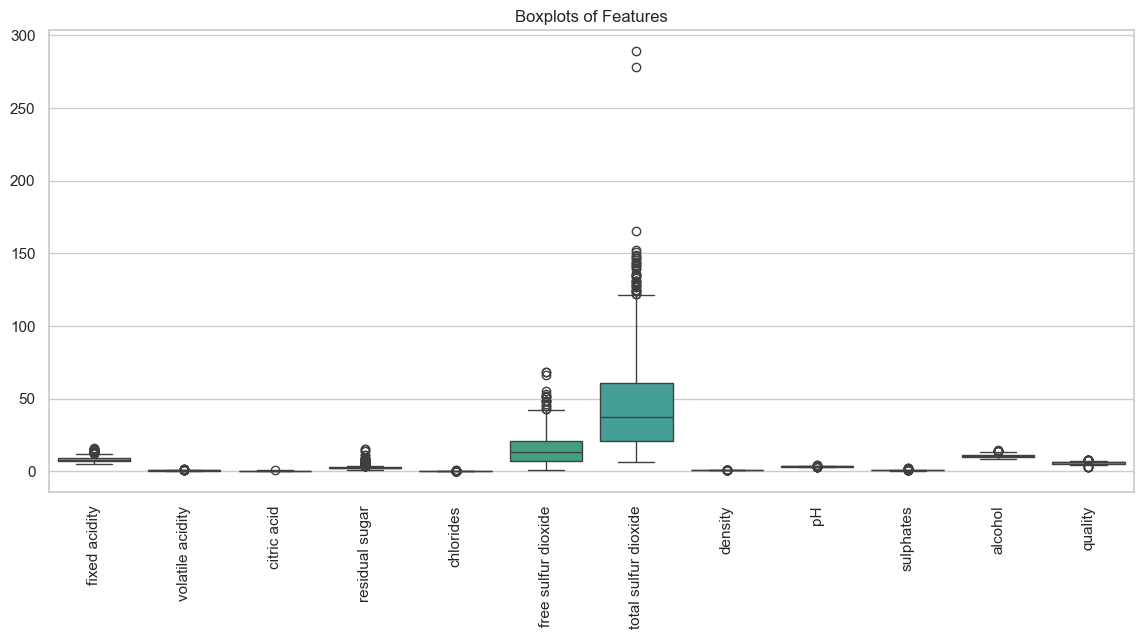

In [37]:
plt.figure(figsize=(14,6))
sns.boxplot(data=data.drop(columns=['Id']))
plt.xticks(rotation=90)
plt.title("Boxplots of Features")
plt.show();

In [38]:
# Outliers Observed in:
    #1.Residual sugar
    #2.Chlorides
    #3.Free and total sulfur dioxide.

## Bivariate Analysis (Features Vs, Quality )

In [39]:
# Alcohol vs Quality 

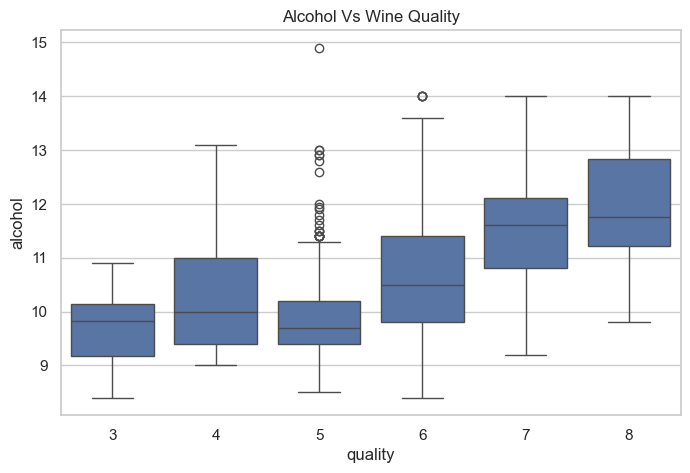

In [40]:
plt.figure(figsize=(8,5))
sns.boxplot(x='quality',y='alcohol',data =data)
plt.title("Alcohol Vs Wine Quality")
plt.show();
    

In [41]:
# Observation : higher-quality wines tend to have higher alcohol content.

In [42]:
# Volatile Acidity Vs. Quality 

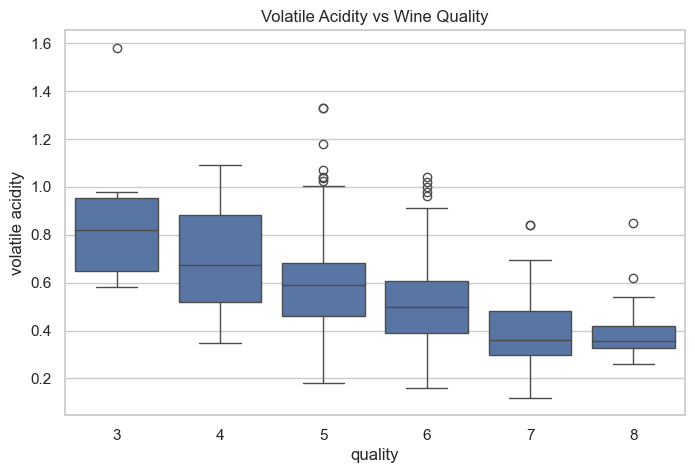

In [43]:
plt.figure(figsize=(8,5))
sns.boxplot(x='quality',y='volatile acidity',data =data)
plt.title('Volatile Acidity vs Wine Quality')
plt.show();

In [44]:
# Observation : High volatile acidity is associated with lower wine quality.

In [45]:
# Suplphates Vs Quality 

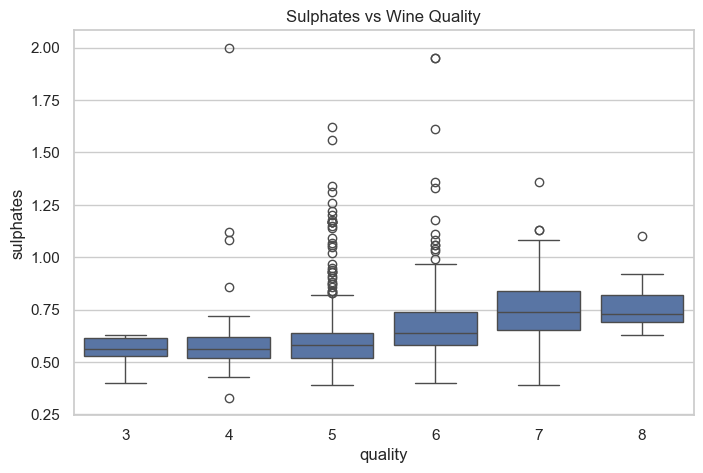

In [46]:
plt.figure(figsize=(8,5))
sns.boxplot(x='quality', y='sulphates', data = data)
plt.title('Sulphates vs Wine Quality')
plt.show();       

In [47]:
# Observation : Sulphates have a moderate positive relationship with quality.

## Correlation Analysis 

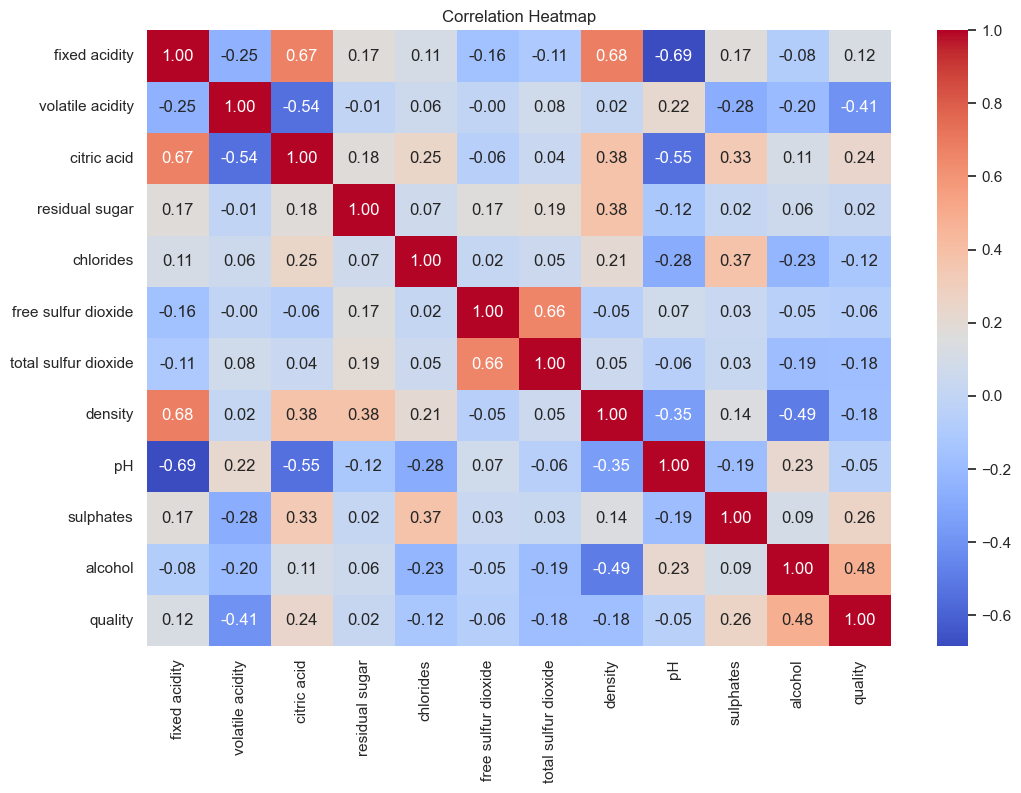

In [48]:
plt.figure(figsize=(12,8))
sns.heatmap(data.drop(columns=['Id']).corr(),annot=True, cmap='coolwarm',fmt='.2f')
plt.title("Correlation Heatmap")
plt.show();

In [49]:
# Key Correlations with Quality :
    # 1. Alcohol : Strong positive correlation 
    # 2. Volatile acidity : Strong negative correlation 
    # 3.Sulphates : Moderate positive correlation 
    # 4.Density : Negative correlation. 

## Multivariate Analysis 

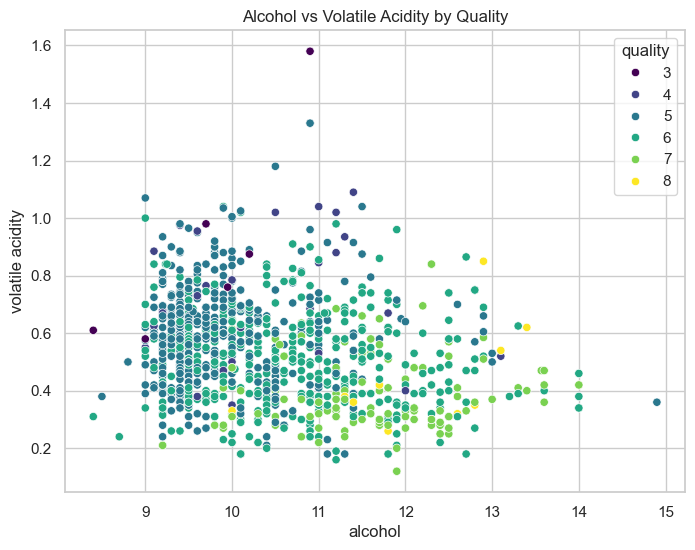

In [50]:
plt.figure(figsize=(8,6))
sns.scatterplot(
    x='alcohol',
    y='volatile acidity',
    hue = 'quality',
    data = data,
    palette = 'viridis'
)

plt.title('Alcohol vs Volatile Acidity by Quality')
plt.show();
           

In [51]:
# Observation : High Quality wines cluster around high alcohol and low volatile acidity

# Machine Learning Modeling 

In [54]:
# Preparing Data for Modeling 

In [55]:
# We drop the ID column as it is uncessary for modelling 

In [56]:
dt = data.drop(columns=['Id'])

In [57]:
# Features and Target
X = dt.drop('quality',axis=1)
y = dt['quality']

In [58]:
# Train-Test Split 

In [59]:
from sklearn.model_selection import train_test_split

In [61]:
X_train, X_test , y_train, y_test = train_test_split(X,y , test_size= 0.2 , random_state=42 ,stratify =y)

In [62]:
# Feature Scaling 

In [63]:
from sklearn.preprocessing import StandardScaler

In [64]:
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)


In [65]:
# Logistic Regression 

In [67]:
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, classification_report

log_reg = LogisticRegression(max_iter=1000)
log_reg.fit(X_train_scaled, y_train)

y_pred_logRe  = log_reg.predict(X_test_scaled)

print("Accuracy :", accuracy_score(y_test,y_pred_logRe))
print(classification_report(y_test, y_pred_logRe))

Accuracy : 0.6244541484716157
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.70      0.78      0.74        97
           6       0.59      0.63      0.61        92
           7       0.43      0.31      0.36        29
           8       0.00      0.00      0.00         3

    accuracy                           0.62       229
   macro avg       0.29      0.29      0.28       229
weighted avg       0.59      0.62      0.60       229



C:\Users\admin\Anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\Anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\Anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Random Forest Classifier 

In [69]:
from sklearn.ensemble import RandomForestClassifier 

In [70]:
rf = RandomForestClassifier ( n_estimators=200,
                             random_state=42)

In [73]:
rf.fit(X_train , y_train)
y_pred_rf = rf.predict(X_test)

print("Accuracy :" , accuracy_score(y_test, y_pred_rf))

print(classification_report(y_test , y_pred_rf))

Accuracy : 0.7161572052401747
              precision    recall  f1-score   support

           3       0.00      0.00      0.00         1
           4       0.00      0.00      0.00         7
           5       0.74      0.86      0.79        97
           6       0.69      0.73      0.71        92
           7       0.70      0.48      0.57        29
           8       0.00      0.00      0.00         3

    accuracy                           0.72       229
   macro avg       0.36      0.34      0.35       229
weighted avg       0.68      0.72      0.69       229



C:\Users\admin\Anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\Anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))
C:\Users\admin\Anaconda4\Lib\site-packages\sklearn\metrics\_classification.py:1565: UndefinedMetricWarning: Precision is ill-defined and being set to 0.0 in labels with no predicted samples. Use `zero_division` parameter to control this behavior.
  _warn_prf(average, modifier, f"{metric.capitalize()} is", len(result))


## Feature Importance 

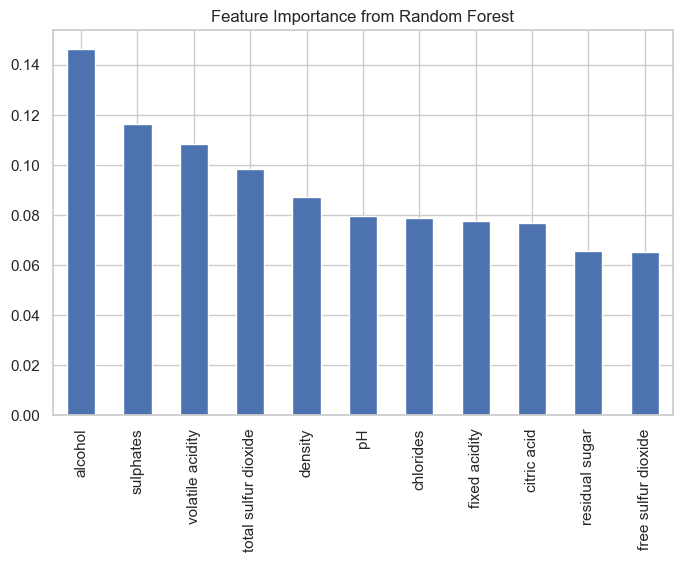

In [74]:
feature_importance = pd.Series(
    rf.feature_importances_,
    index = X.columns).sort_values(ascending = False)

plt.figure(figsize=(8,5))
feature_importance.plot(kind='bar')

plt.title("Feature Importance from Random Forest")

plt.show();

In [75]:
# Most important features typically include:
     #1.Alcohol
    #2.Sulphates 
    #3.Volatile acidity
    #4.Density 

In [76]:
# Model Comparison Summary 
# Model                        Strengths                       Weaknesses
# 1.Logistic Regression         Intrepretable                    Low accurcy 
#2.Random Forest               High Performance                 Less interpretable 

## Summary 

In [77]:
# 1. Wine quality is not evenly distributed
# 2. Alcohol is the strongest positive predictor of quality
# 3. Volatile acidity significantly reduces wine quality
# 4.Chemical attributes exhibit skewness and outliers

## Final Conclusions 

In [78]:
#1.Machine learnng models confirm EDA findings 
#2.Alcohol is the strongest predictor of wine quality
#3.Volatile acidity negatively impacts predictions
#4.Random Forest outperforms linear models